# [Setup](https://github.com/KMnP/fashionpedia-api)

In [1]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-kmiecmge
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-kmiecmge
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263917 sha256=5a51fb4ad5af29eabacebb052baf9605e4d823494fed70464f11ccb52d891d44
  Stored in directory: /tmp/pip-ephem-wheel-cache-8kc9q07f/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [2]:
!pip install fashionpedia

In [3]:
!git clone https://github.com/KMnP/fashionpedia-api.git

Cloning into 'fashionpedia-api'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 101 (delta 42), reused 78 (delta 22), pack-reused 0
Receiving objects: 100% (101/101), 18.13 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [4]:
%cd fashionpedia-api

/content/fashionpedia-api


# Fashionpedia Data Demo
ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [5]:
%matplotlib inline

import numpy as np
import os

from fashionpedia.fp import Fashionpedia

In [6]:
anno_file = "data/sample.json"
img_root = "images"

In [7]:
# initialize Fashionpedia api
fp = Fashionpedia(anno_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading attributes...
attributes index created!


In [8]:
# Display the categories and attributes.
# Pls refer to the final data for the final version of categories and attributes
cats = fp.loadCats(fp.getCatIds())
cat_names =[cat['name'] for cat in cats]
print('Fashionpedia categories: \n{}\n'.format('; '.join(cat_names)))

atts = fp.loadAttrs(fp.getAttIds())
att_names = [att["name"] for att in atts]
print('Fashionpedia attributes (first 10): \n{}\n'.format('; '.join(att_names[:10])))

Fashionpedia categories: 
shirt, blouse; top, t-shirt, sweatshirt; sweater; cardigan; jacket; vest; pants; shorts; skirt; coat; dress; jumpsuit; cape; glasses; earmuffs; hat; headband, head covering, hair accessory; tie; glove; watch; belt; leg warmer; tights, stockings; sock; shoe; bag, wallet; scarf; umbrella; hood; collar; lapel; epaulette; sleeve; garment belt; pocket; neckline; buckle; zipper; applique; bead; bow; flower; fringe; ribbon; rivet; ruffle; sequin; tassel

Fashionpedia attributes (first 10): 
classic (t-shirt); polo (shirt); undershirt; henley (shirt); ringer (t-shirt); raglan (t-shirt); rugby (shirt); sailor (shirt); crop (top); halter (top)



In [9]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
att_ids = fp.getAttIds(attNms=['regular (collar)'])
# att_ids = fp.getAttIds(attIds=[140, 298]) 
img_ids = fp.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

# option 2: get image id randomly from the the anno_file
img_ids = sorted(fp.getImgIds())
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

10223
9813


Segmentation 0:
	Category: shoe
Segmentation 1:
	Category: shoe
Segmentation 2:
	Category: dress
	Attribtues:
		147: knee (length)
		156: wrist-length
		113: symmetrical
		115: fit and flare
		125: circle
		263: gauze
		137: empire waistline
Segmentation 3:
	Category: sleeve
	Attribtues:
		198: set-in sleeve
Segmentation 4:
	Category: sleeve
	Attribtues:
		156: wrist-length
		198: set-in sleeve
Segmentation 5:
	Category: neckline
	Attribtues:
		186: plunging (neckline)


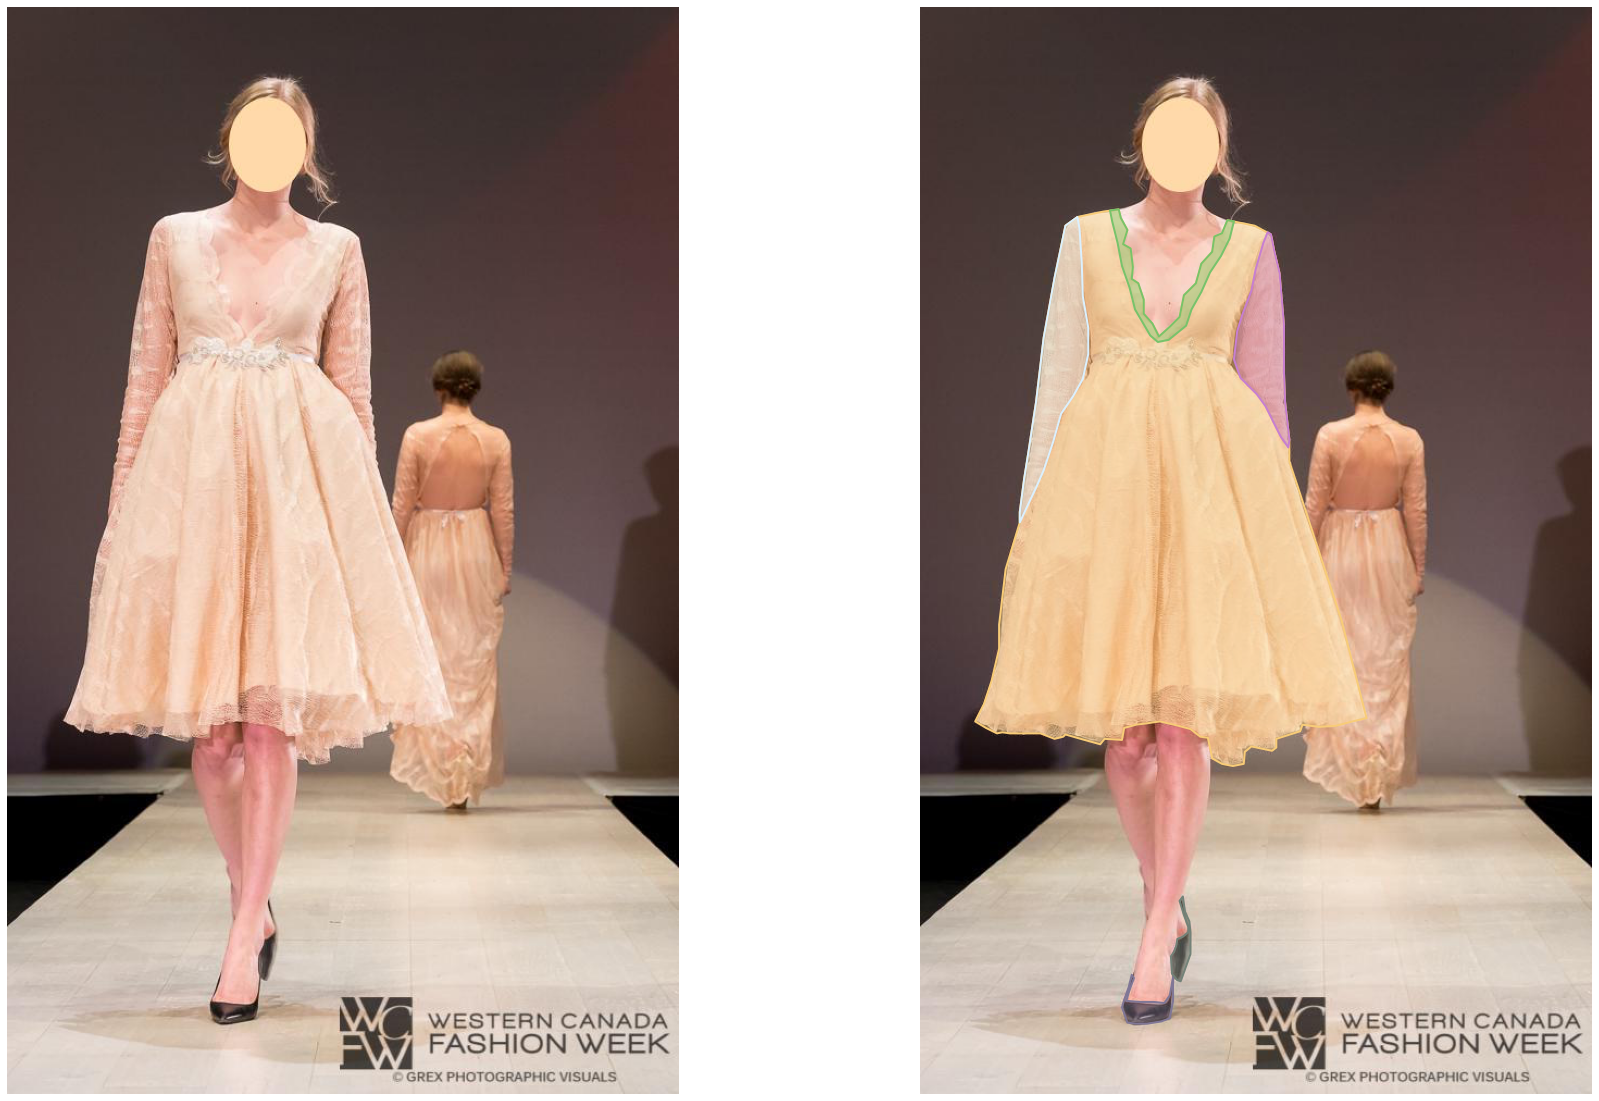

In [10]:
fp.visualize(selected, img_root)

In [11]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

#cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
cat_ids = fp.getCatIds(catNms=['dress'])
att_ids = fp.getAttIds(attNms=['regular (collar)'])
# att_ids = fp.getAttIds(attIds=[140, 298]) 
img_ids = fp.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

# option 2: get image id randomly from the the anno_file
#img_ids = sorted(fp.getImgIds())
#selected = img_ids[np.random.randint(0, len(img_ids))]
#print(selected)

9813


Segmentation 0:
	Category: dress
	Attribtues:
		147: knee (length)
		156: wrist-length
		113: symmetrical
		115: fit and flare
		125: circle
		263: gauze
		137: empire waistline


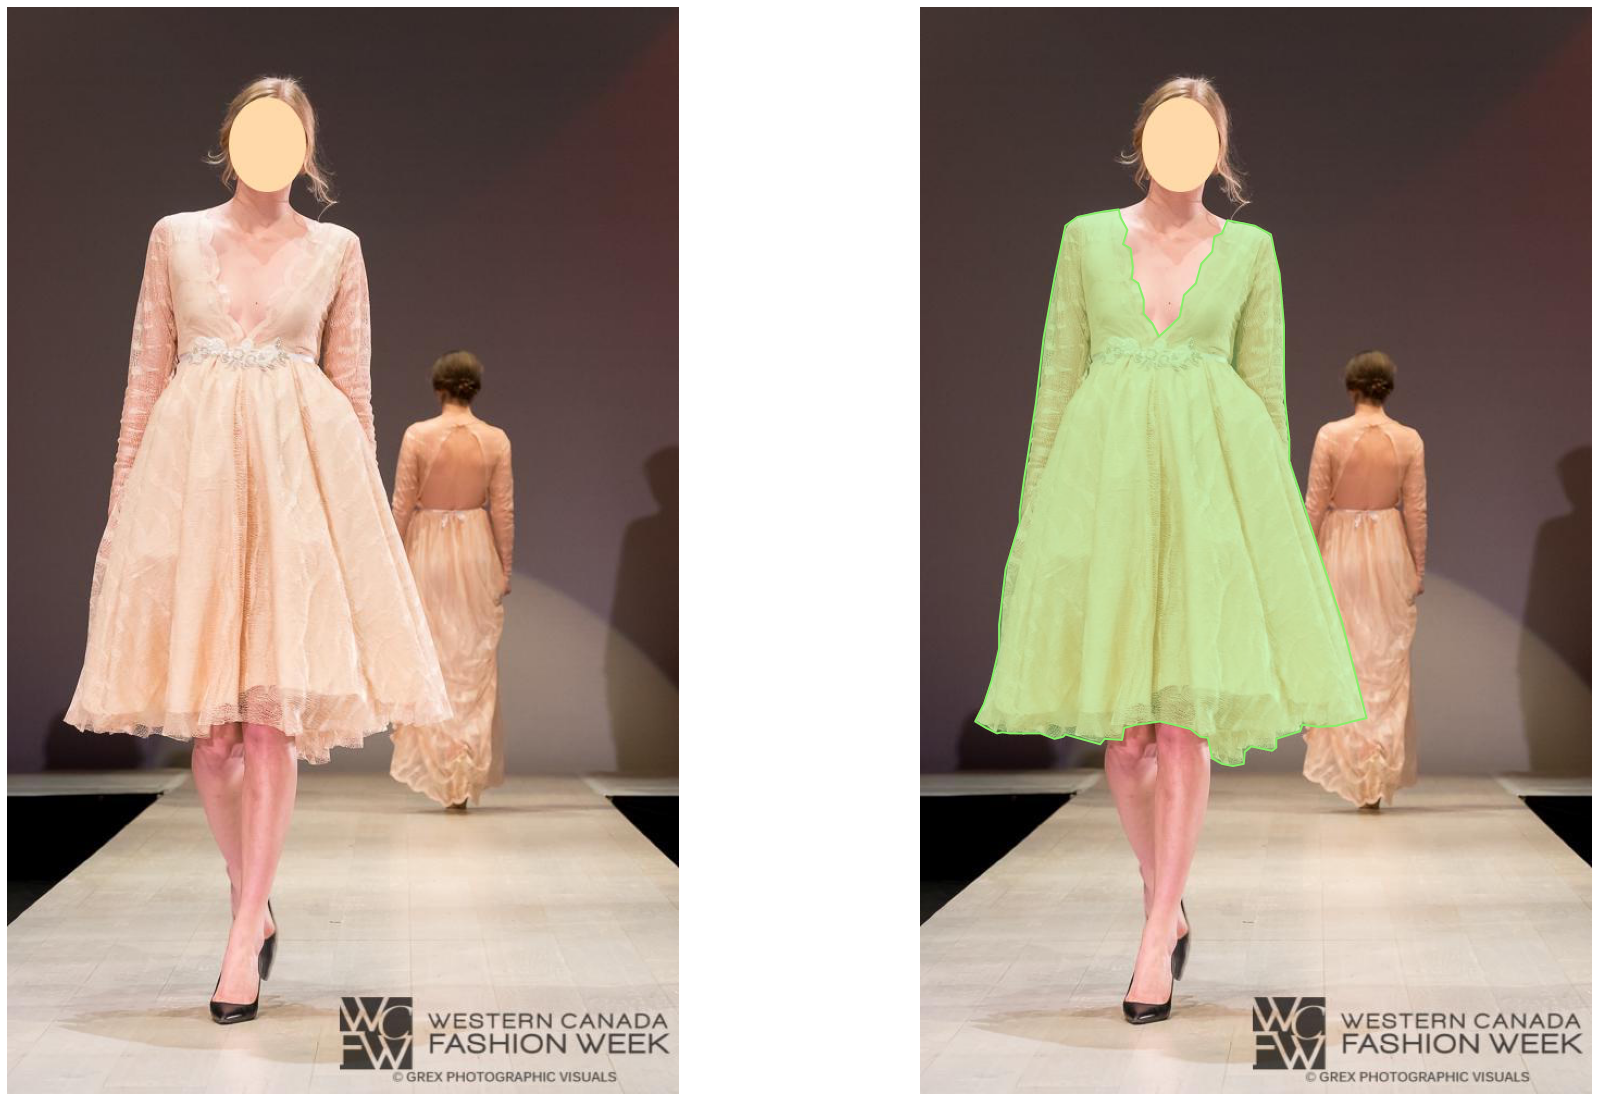

In [12]:
fp.visualize(selected, img_root, cat_ids)

# Mask

In [13]:
"""
API for accessing Fashionpedia2 Dataset in JSON format.
Fashionpedia2 API is a Python API that assists in loading, parsing and visualizing
the annotations in Fashionpedia2.
"""
import os
import sys
import time
import json
import copy
from collections import defaultdict
import cv2
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

import pycocotools.mask as maskUtils
from pycocotools.coco import COCO
PYTHON_VERSION = sys.version_info[0]


def _isArrayLike(obj):
    return hasattr(obj, '__iter__') and hasattr(obj, '__len__')


def _isInList(input, target):
    for i in input:
        if i in target:
            return True
    return False


class Fashionpedia2(COCO):
    def __init__(self, annotation_file=None):
        """Class for reading and visualizing annotations.
        Args:
            annotation_path (str): location of annotation file
        """
        super(Fashionpedia2, self).__init__()
        if annotation_file:
            print('loading annotations into memory...')
            tic = time.time()
            dataset = json.load(open(annotation_file, 'r'))
            assert type(dataset) == dict, \
                'annotation file format {} not supported'.format(type(dataset))
            print('Done (t={:0.2f}s)'.format(time.time() - tic))
            self.dataset = dataset
            self.createIndex()

    def createIndex(self):
        super(Fashionpedia2, self).createIndex()
        # attributes
        attrs = {}
        attToImgs = defaultdict(list)
        print("loading attributes...")
        if 'attributes' in self.dataset:
            for att in self.dataset['attributes']:
                attrs[att['id']] = att

        if 'annotations' in self.dataset and 'attributes' in self.dataset:
            for ann in self.dataset['annotations']:
                attToImgs[ann['category_id']].append(ann['image_id'])
        print("attributes index created!")
        self.attToImgs = attToImgs
        self.attrs = attrs

    def getAnnIds(
        self,
        imgIds=[],
        catIds=[],
        areaRng=[],
        attIds=[],
    ):
        """
        Get ann ids that satisfy given filter conditions.
        default skips that filter
        Args:
            imgIds  (int or int array): get anns for given imgs
            catIds  (int or int array): get anns for given atts
            areaRng (float array): get anns for given area range(e.g. [0 inf])
            attIds (int array): get anns for given atts
            iscrowd (boolean): get anns for given crowd label (False or True)
        Returns:
            ids (int array): integer array of ann ids
        """
        annIds = super(Fashionpedia2, self).getAnnIds(imgIds, catIds, areaRng)
        attIds = attIds if _isArrayLike(attIds) else [attIds]

        anns = self.loadAnns(annIds)
        anns = anns if len(attIds) == 0 else [ann for ann in anns if _isInList(
            ann["attribute_ids"], attIds)]
        ids = [ann['id'] for ann in anns]
        return ids

    def getAttIds(self, attNms=[], supNms=[], attIds=[]):
        """
        get attribute ids with following filtering parameters.
        default skips that filter.
        Args:
            attNms (str array): get atts for given att names
            supNms (str array): get atts for given supercategory names
            attIds (int array): get atts for given att ids
        Returns:
            ids (int array): integer array of att ids
        """
        attNms = attNms if _isArrayLike(attNms) else [attNms]
        supNms = supNms if _isArrayLike(supNms) else [supNms]
        attIds = attIds if _isArrayLike(attIds) else [attIds]

        if len(attNms) == len(supNms) == len(attIds) == 0:
            atts = self.dataset['attributes']
        else:
            atts = self.dataset['attributes']
            atts = atts if len(attNms) == 0 \
                else [att for att in atts if att['name'] in attNms]
            atts = atts if len(supNms) == 0 \
                else [att for att in atts if att['superattegory'] in supNms]
            atts = atts if len(attIds) == 0 \
                else [att for att in atts if att['id'] in attIds]
        ids = [att['id'] for att in atts]
        return ids

    def getImgIds(self, imgIds=[], catIds=[], attIds=[]):
        '''
        Get img ids that satisfy given filter conditions.
        Args:
            imgIds (int array): get imgs for given ids
            catIds (int array): get imgs with all given cats
            attIds (int array): get imgs with all given atts
        Returns:
            ids (int array)  : integer array of img ids
        '''
        ids = super(Fashionpedia2, self).getImgIds(imgIds, catIds)
        attIds = attIds if _isArrayLike(attIds) else [attIds]
        for i, attId in enumerate(attIds):
            if i == 0 and len(ids) == 0:
                ids = set(self.attToImgs[attId])
            else:
                ids &= set(self.attToImgs[attId])
        return list(ids)

    def loadAttrs(self, ids=[]):
        """
        Load atts with the specified ids.
        Args:
            ids (int array): integer ids specifying atts
        Returns:
            atts (object array): loaded att objects
        """
        if _isArrayLike(ids):
            return [self.attrs[idx] for idx in ids]
        elif type(ids) == int:
            return [self.attrs[ids]]

    def showAnns(self, anns, draw_bbox=False):
        """
        Display the specified annotations.
        :param anns (array of object): annotations to display
        :return: None
        """
        if len(anns) == 0:
            return 0
        if 'segmentation' in anns[0] or 'keypoints' in anns[0]:
            datasetType = 'instances'
        elif 'caption' in anns[0]:
            datasetType = 'captions'
        else:
            raise Exception('datasetType not supported')
        if datasetType == 'instances':
            ax = plt.gca()
            ax.set_autoscale_on(False)
            polygons = []
            color = []
            for ann in anns:
                #c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
                # Black
                c = np.array([0.0,0.0,0.0])/255
                # White
                # c = np.array([255.0,255.0,255.0])/255
                if 'segmentation' in ann:
                    if type(ann['segmentation']) == list:
                        # polygon
                        for seg in ann['segmentation']:
                            poly = np.array(seg).reshape((int(len(seg)/2), 2))
                            polygons.append(Polygon(poly))
                            color.append(c)
                    else:
                        # mask
                        t = self.imgs[ann['image_id']]
                        if type(ann['segmentation']['counts']) == list:
                            rle = maskUtils.frPyObjects([ann['segmentation']], t['height'], t['width'])
                        else:
                            rle = [ann['segmentation']]
                        m = maskUtils.decode(rle)
                        img = np.ones( (m.shape[0], m.shape[1], 3) )
                        if ann['iscrowd'] == 1:
                            color_mask = np.array([2.0,166.0,101.0])/255
                        if ann['iscrowd'] == 0:
                            color_mask = np.random.random((1, 3)).tolist()[0]
                        for i in range(3):
                            img[:,:,i] = color_mask[i]
                        ax.imshow(np.dstack( (img, m*0.5) ))
                if 'keypoints' in ann and type(ann['keypoints']) == list:
                    # turn skeleton into zero-based index
                    sks = np.array(self.loadCats(ann['category_id'])[0]['skeleton'])-1
                    kp = np.array(ann['keypoints'])
                    x = kp[0::3]
                    y = kp[1::3]
                    v = kp[2::3]
                    for sk in sks:
                        if np.all(v[sk]>0):
                            plt.plot(x[sk],y[sk], linewidth=3, color=c)
                    plt.plot(x[v>0], y[v>0],'o',markersize=8, markerfacecolor=c, markeredgecolor='k',markeredgewidth=2)
                    plt.plot(x[v>1], y[v>1],'o',markersize=8, markerfacecolor=c, markeredgecolor=c, markeredgewidth=2)

                if draw_bbox:
                    [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
                    poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
                    np_poly = np.array(poly).reshape((4,2))
                    polygons.append(Polygon(np_poly))
                    color.append(c)

            #p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
            p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=1.0)
            #p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.0)
            ax.add_collection(p)
            #p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
            #ax.add_collection(p)
            
        elif datasetType == 'captions':
            for ann in anns:
                print(ann['caption'])
        
        plt.savefig('mask.png')
        # display category and attributes for asscosiated segmentation
        for i, ann in enumerate(anns):
            print("Segmentation {}:".format(i))
            print("\tCategory: {}".format(
                self.cats[ann["category_id"]]["name"]))
            if len(ann["attribute_ids"]) > 0:
                print("\tAttribtues:")
                for attId in ann["attribute_ids"]:
                    print("\t\t{}: {}".format(
                        self.attrs[attId]["id"], self.attrs[attId]["name"]))

    # def showAnns(self, anns):
    #     """addtionally print out the attribute annotations"""
    #     super(Fashionpedia2, self).showAnns(anns)
    #     # display category and attributes for asscosiated segmentation
    #     for i, ann in enumerate(anns):
    #         print("Segmentation {}:".format(i))
    #         print("\tCategory: {}".format(
    #             self.cats[ann["category_id"]]["name"]))
    #         if len(ann["attribute_ids"]) > 0:
    #             print("\tAttribtues:")
    #             for attId in ann["attribute_ids"]:
    #                 print("\t\t{}: {}".format(
    #                     self.attrs[attId]["id"], self.attrs[attId]["name"]))

    def mask(self, imgId, imgRoot, catIds=[], attIds=[]):
        """
        display annotations for one image only.
        Display two image side-by-side:
            left: original image
            right: images with annotated mask with specificed catIds
            print out the attributes at top.
        Args:
            imgId (int): image idx to visualize
            imgRoot (str): path to images
            catIds (List(int)): list of cat to display
            attIds (List(int)): list of att to display
        """
        # load image
        plt.rcParams['figure.figsize'] = [30, 20]
        #plt.subplot(1, 2, 1)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        img = self.loadImgs(imgId)[0]
        imgArray = io.imread(os.path.join(imgRoot, img['file_name']))
        #plt.imshow(imgArray)

        #plt.subplot(1, 2, 2)
        # load and display instance annotations
        print(imgArray.shape)
        height,width,channels= imgArray.shape
        #imgBinary = np.zeros((height, width, channels))
        imgBinary = np.ones((height, width, channels))
        plt.imshow(imgBinary)
        plt.axis('off')
        annIds = self.getAnnIds(imgIds=img['id'], catIds=catIds, attIds=attIds)

        anns = self.loadAnns(annIds)
        self.showAnns(anns)

    def masked(self, imgId, imgRoot, catIds=[], attIds=[]):
        """
        display annotations for one image only.
        Display two image side-by-side:
            left: original image
            right: images with annotated mask with specificed catIds
            print out the attributes at top.
        Args:
            imgId (int): image idx to visualize
            imgRoot (str): path to images
            catIds (List(int)): list of cat to display
            attIds (List(int)): list of att to display
        """
        # load image
        #plt.rcParams['figure.figsize'] = [30, 20]
        #plt.subplot(1, 2, 1)
        plt.subplot(1, 1, 1)
        plt.axis('off')        
        #image_rgba = io.imread('image.png')
        #image_rgb = skimage.color.rgba2rgb(image_rgba)
        #mask_rgba = io.imread('mask.png')
        #mask_rgb = skimage.color.rgba2rgb(mask_rgba)
        #
        #masked_image = image_rgb * mask_rgb
        #plt.imshow(masked_image)
        img1 = cv2.imread('image.png')
        img2 = cv2.imread('mask.png')
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        final_roi = cv2.bitwise_or(img1, img2)
        plt.imshow(final_roi)

    def show(self, imgId, imgRoot, catIds=[], attIds=[]):
        """
        display annotations for one image only.
        Display two image side-by-side:
            left: original image
            right: images with annotated mask with specificed catIds
            print out the attributes at top.
        Args:
            imgId (int): image idx to visualize
            imgRoot (str): path to images
            catIds (List(int)): list of cat to display
            attIds (List(int)): list of att to display
        """
        # load image
        plt.rcParams['figure.figsize'] = [30, 20]
        #plt.subplot(1, 2, 1)
        plt.subplot(1, 1, 1)
        plt.axis('off')
        img = self.loadImgs(imgId)[0]
        imgArray = io.imread(os.path.join(imgRoot, img['file_name']))
        plt.imshow(imgArray)
        plt.savefig('image.png')

        #plt.subplot(1, 2, 2)
        ## load and display instance annotations
        #plt.imshow(imgArray)
        #plt.axis('off')
        #annIds = self.getAnnIds(imgIds=img['id'], catIds=catIds, attIds=attIds)
        #
        #anns = self.loadAnns(annIds)
        #self.showAnns(anns)

    def visualize(self, imgId, imgRoot, catIds=[], attIds=[]):
        """
        display annotations for one image only.
        Display two image side-by-side:
            left: original image
            right: images with annotated mask with specificed catIds
            print out the attributes at top.
        Args:
            imgId (int): image idx to visualize
            imgRoot (str): path to images
            catIds (List(int)): list of cat to display
            attIds (List(int)): list of att to display
        """
        # load image
        plt.rcParams['figure.figsize'] = [30, 20]
        plt.subplot(1, 2, 1)
        plt.axis('off')
        img = self.loadImgs(imgId)[0]
        imgArray = io.imread(os.path.join(imgRoot, img['file_name']))
        plt.imshow(imgArray)

        plt.subplot(1, 2, 2)
        # load and display instance annotations
        plt.imshow(imgArray)
        plt.axis('off')
        annIds = self.getAnnIds(imgIds=img['id'], catIds=catIds, attIds=attIds)

        anns = self.loadAnns(annIds)
        self.showAnns(anns)

    def loadRes(self, resFile):
        """
        Load result file and return a result api object.
        :param   resFile (str)     : file name of result file
        :return: res (obj)         : result api object
        """
        res = Fashionpedia2()
        res.dataset['images'] = [img for img in self.dataset['images']]

        print('Loading and preparing results...')
        tic = time.time()
        if type(resFile) == str \
           or (PYTHON_VERSION == 2 and type(resFile) == unicode):
            anns = json.load(open(resFile))
        else:
            anns = resFile
        assert type(anns) == list, 'results in not an array of objects'
        annsImgIds = [ann['image_id'] for ann in anns]
        assert set(annsImgIds) == (set(annsImgIds) & set(self.getImgIds())), \
            'Results do not correspond to current coco set'

        if 'bbox' in anns[0] and not anns[0]['bbox'] == []:
            res.dataset['categories'] = copy.deepcopy(
                self.dataset['categories'])
            for id, ann in enumerate(anns):
                bb = ann['bbox']
                x1, x2, y1, y2 = [bb[0], bb[0]+bb[2], bb[1], bb[1]+bb[3]]
                if 'segmentation' not in ann:
                    ann['segmentation'] = [[x1, y1, x1, y2, x2, y2, x2, y1]]
                ann['area'] = bb[2]*bb[3]
                ann['id'] = id+1
                ann['iscrowd'] = 0
        elif 'segmentation' in anns[0]:
            res.dataset['categories'] = copy.deepcopy(
                self.dataset['categories'])
            for idx, ann in enumerate(anns):
                # now only support compressed RLE format as segmentation
                ann['area'] = maskUtils.area(ann['segmentation'])
                if 'bbox' not in ann:
                    ann['bbox'] = maskUtils.toBbox(ann['segmentation'])
                ann['id'] = idx+1
                ann['iscrowd'] = 0

        print('DONE (t={:0.2f}s)'.format(time.time() - tic))

        res.dataset['annotations'] = anns
        res.dataset["attributes"] = self.dataset["attributes"]
        res.dataset["categories"] = self.dataset["categories"]
        res.createIndex()
        return res
        # raise NotImplementedError

    def download(self, tarDir=None, imgIds=[]):
        raise NotImplementedError

    def loadNumpyAnnotations(self, data):
        raise NotImplementedError

In [14]:
# initialize Fashionpedia api
fp2 = Fashionpedia2(anno_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading attributes...
attributes index created!


In [15]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

#cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
cat_ids = fp2.getCatIds(catNms=['dress'])
att_ids = fp2.getAttIds(attNms=['regular (collar)'])
# att_ids = fp.getAttIds(attIds=[140, 298]) 
img_ids = fp2.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

# option 2: get image id randomly from the the anno_file
#img_ids = sorted(fp.getImgIds())
#selected = img_ids[np.random.randint(0, len(img_ids))]
#print(selected)

9813


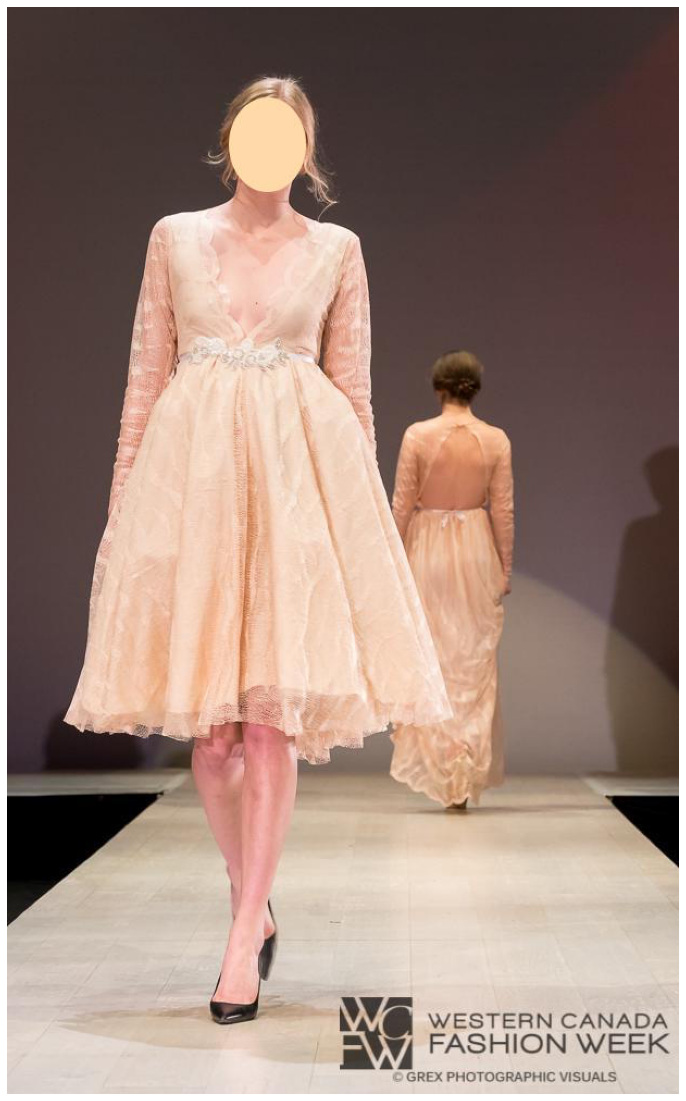

In [16]:
fp2.show(selected, img_root, cat_ids)

(1000, 618, 3)
Segmentation 0:
	Category: dress
	Attribtues:
		147: knee (length)
		156: wrist-length
		113: symmetrical
		115: fit and flare
		125: circle
		263: gauze
		137: empire waistline


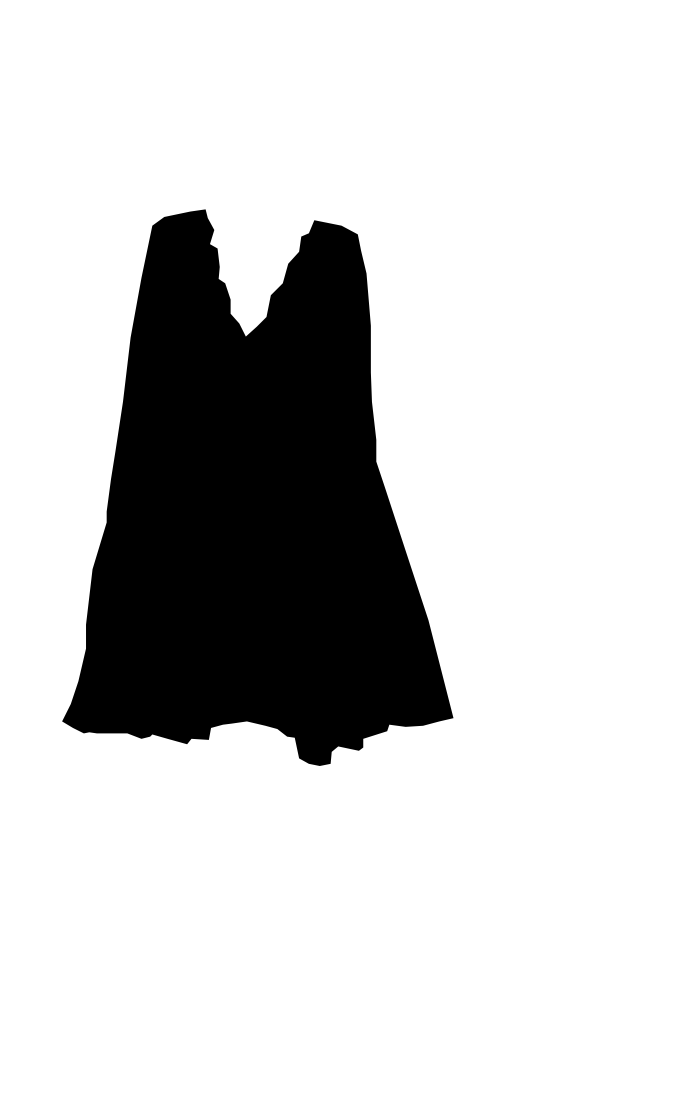

In [17]:
#fp2.visualize(selected, img_root, cat_ids)
fp2.mask(selected, img_root, cat_ids)

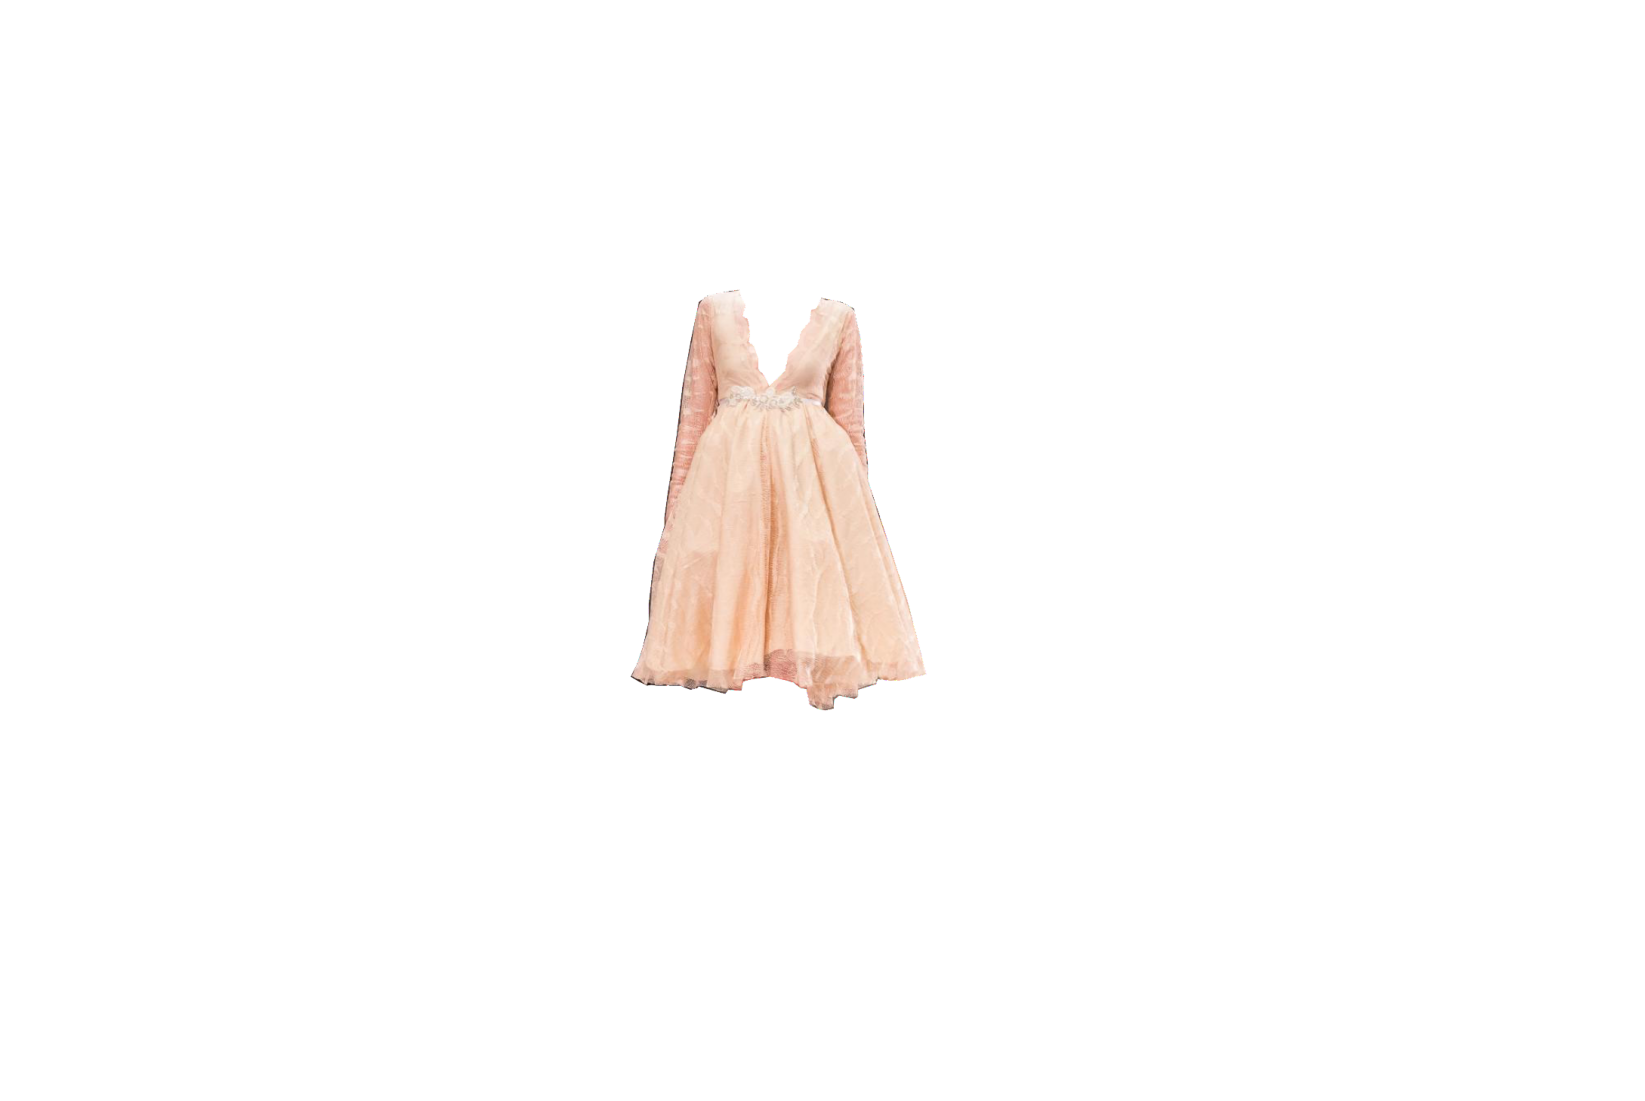

In [18]:
fp2.masked(selected, img_root, cat_ids)

In [19]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random

#cat_ids = fp2.getCatIds(catNms=['pants','sleeve'])
#cat_ids = fp2.getCatIds(catNms=['dress'])
#cat_ids = fp2.getCatIds(catNms=['shoe'])
cat_ids = fp2.getCatIds(catNms=['pants'])
att_ids = fp2.getAttIds(attNms=['regular (collar)'])
# att_ids = fp2.getAttIds(attIds=[140, 298]) 
img_ids = fp2.getImgIds(catIds=cat_ids)
selected = img_ids[np.random.randint(0, len(img_ids))]
print(selected)

## option 2: get image id randomly from the the anno_file
#img_ids = sorted(fp2.getImgIds())
#selected = img_ids[np.random.randint(0, len(img_ids))]
#print(selected)

10223


(1478, 1000, 3)
Segmentation 0:
	Category: pants
	Attribtues:
		224: fly (opening)
		113: symmetrical
		298: plain (pattern)
		140: normal waist
Segmentation 1:
	Category: sleeve
	Attribtues:
		156: wrist-length
		198: set-in sleeve
Segmentation 2:
	Category: sleeve
	Attribtues:
		156: wrist-length
		198: set-in sleeve
Segmentation 3:
	Category: shirt, blouse
Segmentation 4:
	Category: hat
Segmentation 5:
	Category: collar
	Attribtues:
		158: regular (collar)


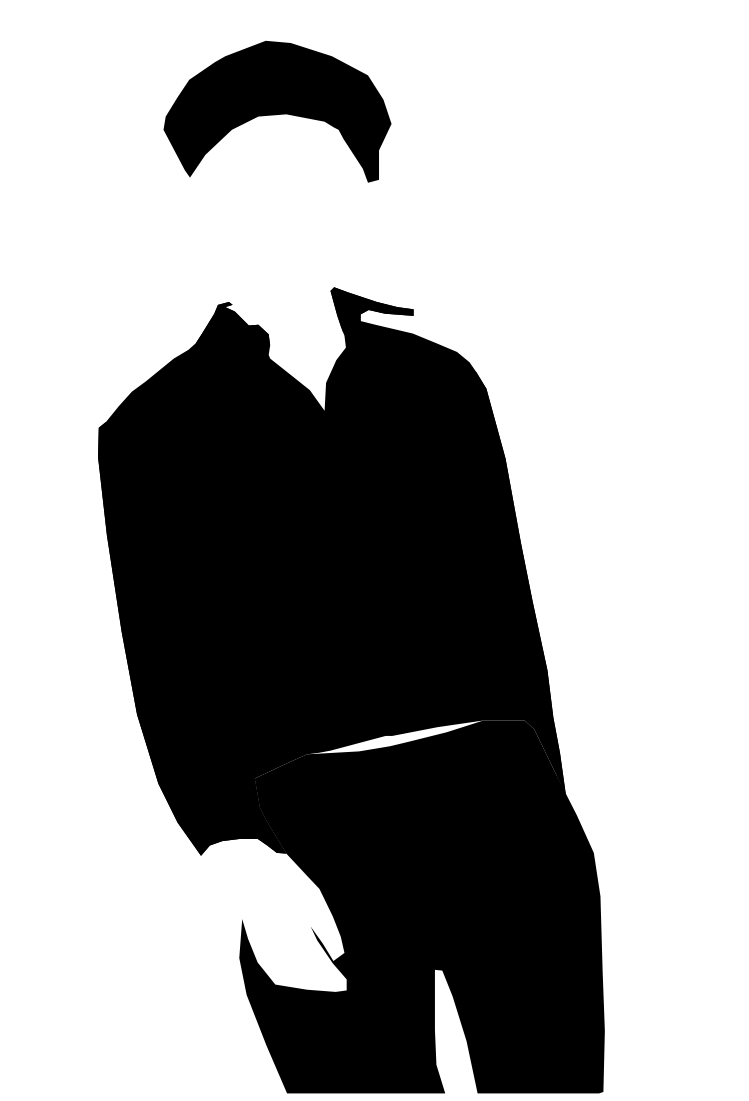

In [20]:
#fp2.visualize(selected, img_root)
fp2.mask(selected, img_root)

#fp2.visualize(selected, img_root, cat_ids)
#fp2.mask(selected, img_root, cat_ids)

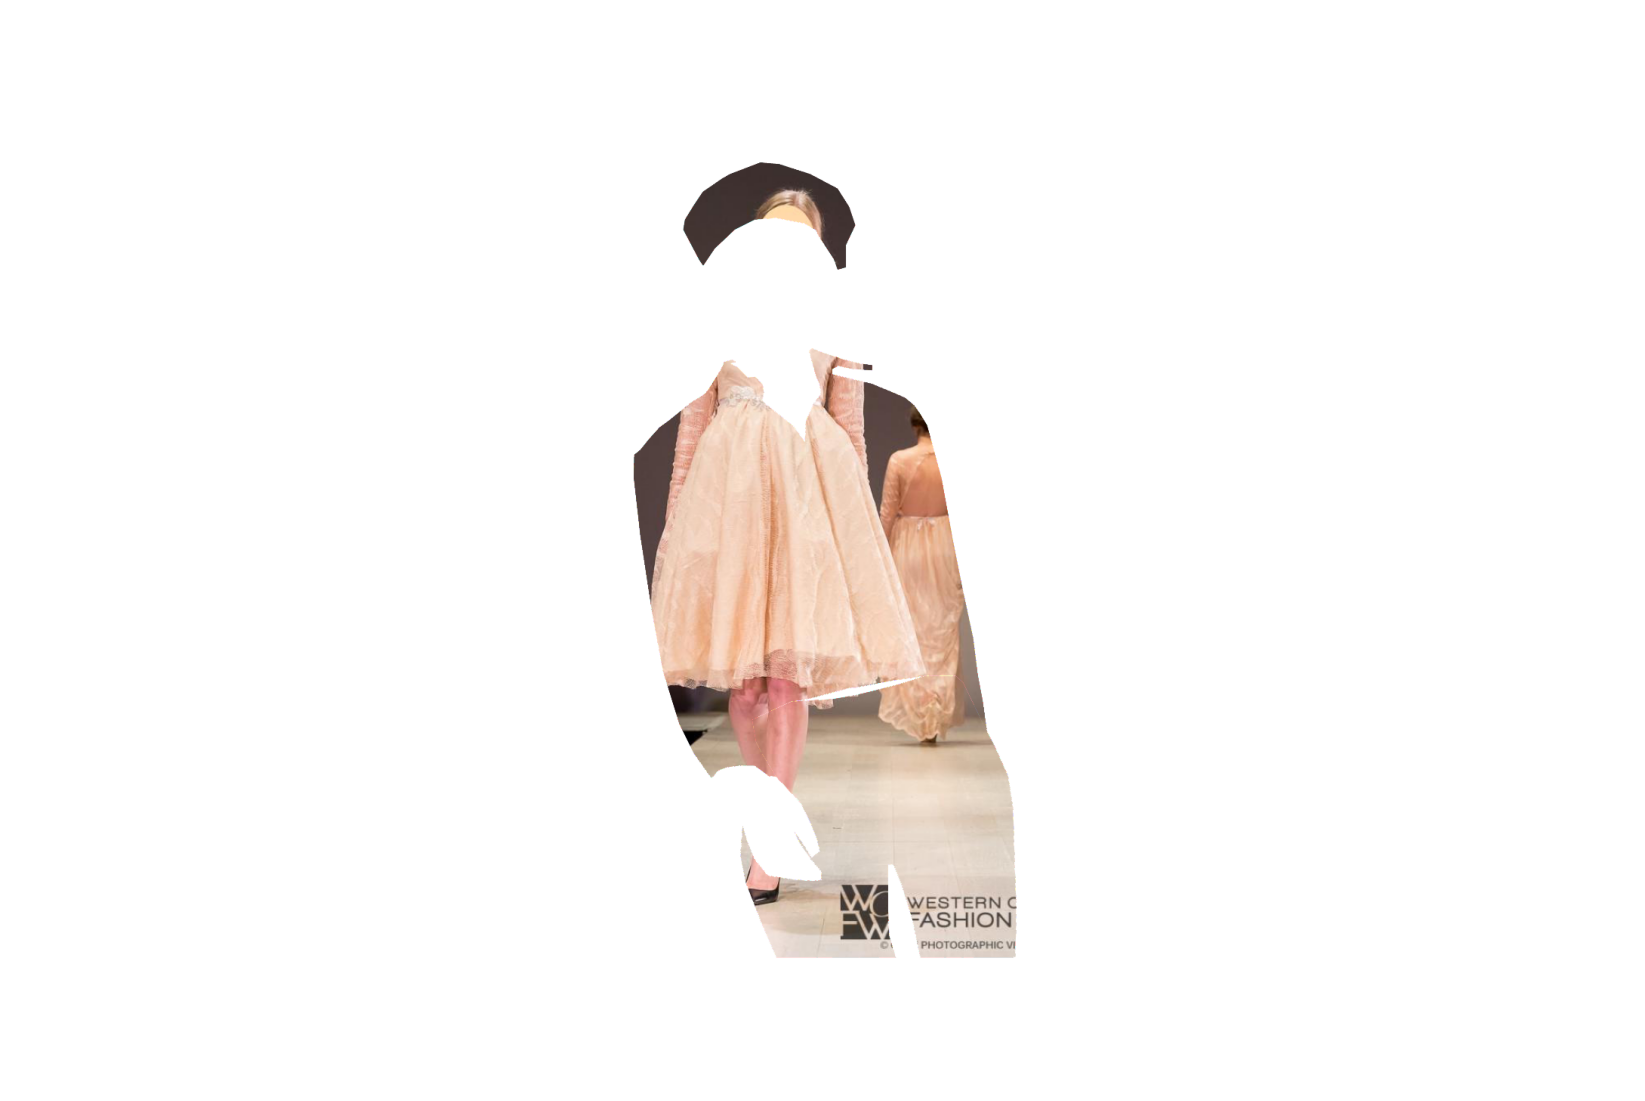

In [21]:
fp2.masked(selected, img_root, cat_ids)

### Note

The Fashionpedia does not own the copyright of the images. The users of the Fashionpedia accept full responsibility for the use of the Fashionpedia dataset, including but not limited to the use of any copies of copyrighted images that they may create from the Fashionpedia.
Check out our [Terms of Use](https://fashionpedia.github.io/home/data_license.html) for more details.